In [3]:
import pandas as pd
import numpy as np

# === User input ===
csv_input_path = "Desktop/Dragonfly sesh/Hb-refined-scalar.csv"  # Replace with your actual file path
csv_output_path = "Desktop/Dragonfly sesh/refined-MCI-Hb.csv"     # Output file

# === Load data ===
df = pd.read_csv(csv_input_path, encoding='latin1')

# === Clean data: check required columns ===
required_cols = ['Volume', 'SurfaceArea']
missing = [col for col in required_cols if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns in CSV: {missing}")

# === Convert Volume from μm³ to nm³ ===
#df['Volume_nm3'] = df['Volume'] * 1e9

# === Filter out zero or negative values (avoid divide-by-zero) ===
df = df[(df['Volume'] > 0) & (df['SurfaceArea'] > 0)]

# === Calculate MCI ===
pi = np.pi
df['MCI'] = (df['SurfaceArea']**3) / (16 * pi**2 * (df['Volume']**2))

# === Recalculate MCI (if needed) using updated volume ===
# MCI = (SA^3) / (16π² V^2)
# Note: If your surface area is still in μm², the units will not match physically, but MCI will still work as a dimensionless shape metric.
#pi = np.pi
#df['MCI_recalc'] = (df['SurfaceArea']**3) / (16 * pi**2 * (df['Volume_nm3']**2))

# === Save to new CSV ===
df.to_csv(csv_output_path, index=False)

print(f"✅ MCI calculated and saved to: {csv_output_path}")

✅ MCI calculated and saved to: Desktop/Dragonfly sesh/refined-MCI-Hb.csv


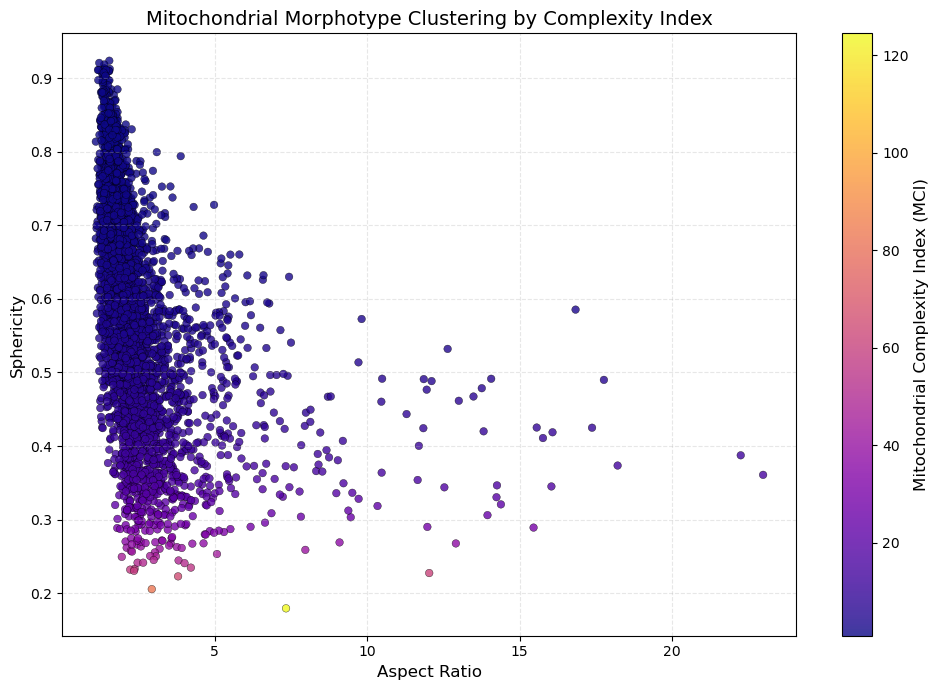

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load your dataset ===
csv_path = "Desktop/Dragonfly sesh/refined-MCI-Hb.csv"  # Replace with your file name
df = pd.read_csv(csv_path, encoding='latin1')

# === Clean / sanity check ===
df = df[(df['MCI'] > 0) & (df['AspectRatio'] > 0) & (df['Sphericity'] > 0)]

# === Set up figure ===
plt.figure(figsize=(10, 7))

# === Scatter plot: X = Aspect Ratio, Y = Sphericity, Color = MCI ===
scatter = plt.scatter(
    df['AspectRatio'],
    df['Sphericity'],
    c=df['MCI'],
    cmap='plasma',         # Try 'viridis', 'turbo', 'magma', etc.
    s=30,                  # Size of points
    alpha=0.8,             # Transparency
    edgecolors='k',        # Optional: black border around points
    linewidths=0.3
)

# === Add colorbar ===
cbar = plt.colorbar(scatter)
cbar.set_label('Mitochondrial Complexity Index (MCI)', fontsize=12)

# === Axes and labels ===
plt.xlabel('Aspect Ratio', fontsize=12)
plt.ylabel('Sphericity', fontsize=12)
plt.title('Mitochondrial Morphotype Clustering by Complexity Index', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("Desktop/Dragonfly sesh/MCI-Sphericity-AspectRatio.png", dpi=300, bbox_inches='tight') #activate this line when you are ready to save

plt.show()


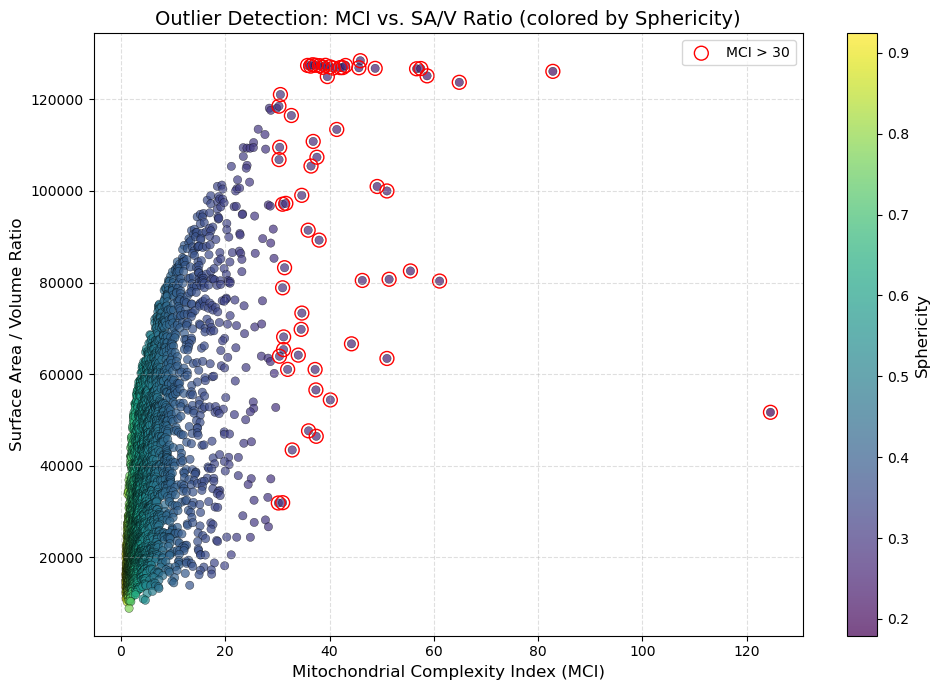

✅ Saved figure as 'MCI_Outlier_Scatter.png'
✅ Exported 61 high-MCI outliers to 'Flagged_High_MCI_Outliers.csv'


In [9]:
# --- Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Load your CSV file ---
csv_path = "Desktop/Dragonfly sesh/refined-MCI-Hb.csv"  # Replace with your file name
df = pd.read_csv(csv_path, encoding='latin1')

# --- Compute Surface Area to Volume Ratio ---
df['SA_V_Ratio'] = df['SurfaceArea'] / df['Volume']

# --- Flag outliers based on MCI ---
df['High_MCI'] = df['MCI'] > 30

# --- Create scatter plot ---
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df['MCI'],
    df['SA_V_Ratio'],
    c=df['Sphericity'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='k',
    linewidths=0.3
)

# --- Highlight MCI > 30 ---
outliers = df[df['High_MCI']]
plt.scatter(
    outliers['MCI'],
    outliers['SA_V_Ratio'],
    facecolors='none',
    edgecolors='red',
    s=100,
    label='MCI > 30'
)

# --- Add colorbar and labels ---
cbar = plt.colorbar(scatter)
cbar.set_label('Sphericity', fontsize=12)

plt.xlabel('Mitochondrial Complexity Index (MCI)', fontsize=12)
plt.ylabel('Surface Area / Volume Ratio', fontsize=12)
plt.title('Outlier Detection: MCI vs. SA/V Ratio (colored by Sphericity)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# --- Save figure as PNG ---
plt.savefig("Desktop/Dragonfly sesh/MCI_Outlier_Scatter.png", dpi=300, bbox_inches='tight')

# --- Show plot ---
plt.show()

# --- Export flagged outliers to CSV ---
outliers.to_csv("Desktop/Dragonfly sesh/Flagged_High_MCI_Outliers.csv", index=False)
print(f"✅ Saved figure as 'MCI_Outlier_Scatter.png'")
print(f"✅ Exported {len(outliers)} high-MCI outliers to 'Flagged_High_MCI_Outliers.csv'")


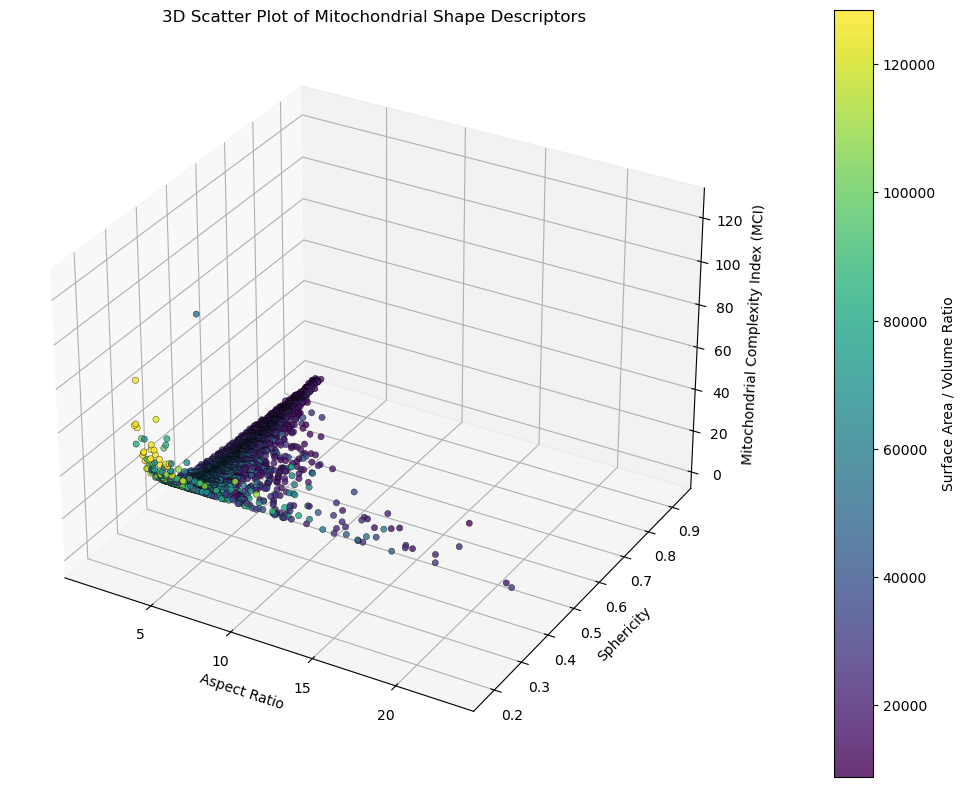

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Load your dataset ---
csv_path = "Desktop/Dragonfly sesh/refined-MCI-Hb.csv"  # Replace with your file name
df = pd.read_csv(csv_path, encoding='latin1')

# --- Clean: Remove invalid values (optional) ---
df = df[(df['MCI'] > 0) & (df['Volume'] > 0) & (df['Sphericity'] > 0)]

# --- Compute SA/V ratio if not already present ---
if 'SA_V_Ratio' not in df.columns:
    df['SA_V_Ratio'] = df['SurfaceArea'] / df['Volume']

# --- Extract variables ---
x = df['AspectRatio']
y = df['Sphericity']
z = df['MCI']
c = df['SA_V_Ratio']  # Or use 'Sphericity' if preferred for color coding

# --- Create 3D scatter plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=c, cmap='viridis', alpha=0.8, edgecolor='k', linewidth=0.3)

# --- Axis labels ---
ax.set_xlabel('Aspect Ratio')
ax.set_ylabel('Sphericity')
ax.set_zlabel('Mitochondrial Complexity Index (MCI)')
ax.set_title('3D Scatter Plot of Mitochondrial Shape Descriptors')

# --- Colorbar ---
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Surface Area / Volume Ratio')

plt.tight_layout()
plt.show()
